<a href="https://colab.research.google.com/github/Carlos-Ruiz-Ed/Valores_Atipicos/blob/main/Act3_ValoresAtipicos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Actividad 3: Valores Atípicos

Carlos Eduardo Ruiz Benavides

A01702749

##Importar librerias y subir el archivo

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Cargar archivo csv desde equipo
from google.colab import files
files.upload()

#Hoja 2023

##Eliminacion de Outliers con Desviacion estandard

In [40]:
df_2023 = pd.read_excel("Gastos y costos 20-23.xlsx",header=3, sheet_name='2023')
df_2023

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,NaN,9807.07,9807.07,I,Vigente,PE03-ENE23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,3.0,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,I,Vigente,NaN
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,1.0,1.0,220.00,0.00,0.0,0.0,NaN,220.00,220.00,I,Vigente,NaN
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,3.0,1.0,18071.52,682.40,0.0,0.0,NaN,18753.92,18753.92,I,Vigente,NaN
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,5.0,1.0,14472.32,0.00,0.0,0.0,NaN,14472.32,14472.32,I,Vigente,NaN


###Remplazo de valores nulos del dataframe

In [41]:
#Corroboramos cuantos valores nulos hay en el dataframe
nulos=df_2023.isnull().sum()
nulos

Fecha            0
Folio           13
UUID             0
RFC              0
Proveedor        0
TIPO GASTO       8
Descripción      0
MP              71
FP              71
TC               0
Importe          0
IVA              0
RET ISR          0
RET IVA          0
Otros          397
TOTAL MX         0
TOTAL SAT        0
Tipo             0
Status           0
Poliza         115
dtype: int64

In [42]:
#Reemplazamos valores nulos del dataframe con "bfill"
df_2023 =df_2023.fillna(method="bfill")
#Eliminmos la columna Otros que se encuentra completamente vacia
df_2023 = df_2023.drop('Otros', axis=1)
df_2023

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,PE01-ENE23
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,PPD,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,PE01-ENE23
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,I,Vigente,PE01-ENE23
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,I,Vigente,PE02-ENE23
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07,I,Vigente,PE03-ENE23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,NaN
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,PUE,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00,I,Vigente,NaN
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92,I,Vigente,NaN
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,PUE,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32,I,Vigente,NaN


In [43]:
#Corroboramos otra vez los valores nulos
nulos = df_2023.isnull().sum()
nulos

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             1
FP             1
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         8
dtype: int64

In [44]:
#Eliminamos los valores nulos faltanes con el metodo ffill
df_2023 =df_2023.fillna(method="ffill")

In [45]:
#Corroboramos otra vez los valores nulos
nulos = df_2023.isnull().sum()
nulos

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
FP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64

###Boxplot de los datos

<Figure size 1500x800 with 0 Axes>

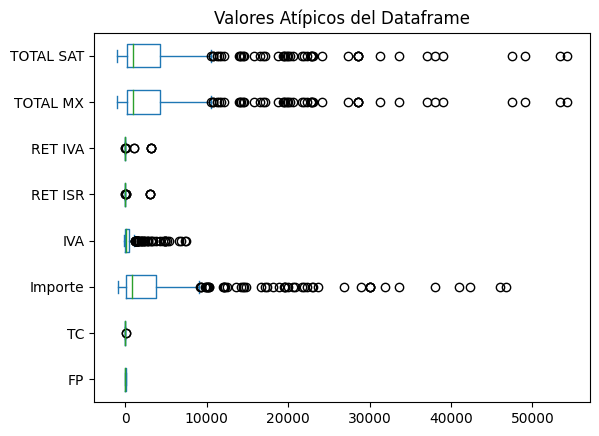

In [46]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_2023.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

###Metodo de eliminacion de Outliers con desviacion standard

In [47]:
#Método aplicando desviación estandar. Encuentro los valores extremos
y = df_2023
Limite_Superior = y.mean() + 3*y.std()
Limite_Inferior = y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido FP             186.732206
Fecha                 NaT
IVA           3761.774707
Importe      26557.244156
RET ISR        931.175004
RET IVA       1022.471745
TC               4.957143
TOTAL MX     29218.464899
TOTAL SAT    29218.464899
dtype: object
Limite inferior permitido FP             -98.994171
Fecha                 NaT
IVA          -2766.954304
Importe     -18708.366775
RET ISR       -869.142712
RET IVA       -947.124289
TC               -2.77403
TOTAL MX    -20512.146863
TOTAL SAT   -20512.146863
dtype: object


<ipython-input-47-67aa5a66b1e5>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  Limite_Superior = y.mean() + 3*y.std()
<ipython-input-47-67aa5a66b1e5>:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior = y.mean() + 3*y.std()
<ipython-input-47-67aa5a66b1e5>:3: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  Limite_Superior = y.mean() + 3*y.std()
<ipython-input-47-67aa5a66b1e5>:4: FutureWarning: DataFrame.mean and DataFram

In [48]:
#Obtenemos datos y los outliers se convierten en nulos en el DataFrame
data2 = df_2023[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data2

<ipython-input-48-cde31c9f8b81>:2: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data2 = df_2023[(y<=Limite_Superior)&(y>=Limite_Inferior)]


,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
1,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
2,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,NaN,NaN,NaN
3,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,NaN,NaN,NaN
4,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00,NaN,NaN,NaN
393,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00,NaN,NaN,NaN
394,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92,NaN,NaN,NaN
395,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32,NaN,NaN,NaN


In [49]:
#Eliminamos columnas innecesarias
data3= data2.drop(['Fecha',"Folio","UUID","RFC","Proveedor",
                   "TIPO GASTO","Descripción","Tipo","Status","Poliza", "MP"], axis=1)

data3

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [50]:
#Corroboramos valores nulos del dataframe3
valores_nulos=data3.isnull().sum()
valores_nulos

FP            0
TC            2
Importe      13
IVA          13
RET ISR       4
RET IVA       6
TOTAL MX      9
TOTAL SAT     9
dtype: int64

In [51]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data_clean1 = data3.copy()
data_clean1 = data_clean1.fillna(round(data3.mean(),1))
data_clean1

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [52]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos = data_clean1.isnull().sum()
valores_nulos

FP           0
TC           0
Importe      0
IVA          0
RET ISR      0
RET IVA      0
TOTAL MX     0
TOTAL SAT    0
dtype: int64

In [53]:
# Unimos la columnas que quitamos con el dataframe
columnas_eliminadas = df_2023[['Fecha',"Folio","UUID","RFC","Proveedor",
"TIPO GASTO","Descripción","Tipo","Status","Poliza", "MP"]]

data_clean1 = pd.concat([columnas_eliminadas, data_clean1], axis=1)
data_clean1

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,Tipo,Status,Poliza,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,Vigente,PE01-ENE23,PPD,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,Vigente,PE01-ENE23,PPD,99.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,I,Vigente,PE01-ENE23,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,I,Vigente,PE02-ENE23,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,I,Vigente,PE03-ENE23,PPD,99.0,1.0,8454.37,1352.70,0.0,0.0,9807.07,9807.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,I,Vigente,PE111-FEB23,PUE,3.0,1.0,0.00,0.00,0.0,0.0,0.00,0.00
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,I,Vigente,PE111-FEB23,PUE,1.0,1.0,220.00,0.00,0.0,0.0,220.00,220.00
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,I,Vigente,PE111-FEB23,PUE,3.0,1.0,18071.52,682.40,0.0,0.0,18753.92,18753.92
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,I,Vigente,PE111-FEB23,PUE,5.0,1.0,14472.32,0.00,0.0,0.0,14472.32,14472.32


In [54]:
#Convertir DataFrame a CSV
data_clean1.to_csv("Datos_Desviacion2023.csv")

In [55]:
#descargar archivo filtrado en csv
from google.colab import files


files.download("Datos_Desviacion2023.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

##Eliminacion de Outliers con Cuantiles

In [37]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data3

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido FP            243.00000
TC              1.00000
Importe      7190.16750
IVA           919.85625
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX     8503.49625
TOTAL SAT    8503.49625
dtype: float64
Limite inferior permitido FP           -141.00000
TC              1.00000
Importe     -4159.61250
IVA          -551.91375
RET ISR         0.00000
RET IVA         0.00000
TOTAL MX    -4906.41375
TOTAL SAT   -4906.41375
dtype: float64


In [38]:
#Obtenemos datos limpios del Dataframe
data3_iqr= data3[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
1,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
4,99.0,1.0,NaN,NaN,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
393,1.0,1.0,220.00,0.00,0.0,0.0,220.0,220.0
394,3.0,1.0,NaN,682.40,0.0,0.0,NaN,NaN
395,5.0,1.0,NaN,0.00,0.0,0.0,NaN,NaN


In [39]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

FP            0
TC            2
Importe      64
IVA          57
RET ISR       9
RET IVA       9
TOTAL MX     63
TOTAL SAT    63
dtype: int64

In [57]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
1,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2,99.0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
3,99.0,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
4,99.0,1.0,1244.00,157.40,0.0,0.0,1444.7,1444.7
...,...,...,...,...,...,...,...,...
392,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
393,1.0,1.0,220.00,0.00,0.0,0.0,220.0,220.0
394,3.0,1.0,1244.00,682.40,0.0,0.0,1444.7,1444.7
395,5.0,1.0,1244.00,0.00,0.0,0.0,1444.7,1444.7


In [58]:
# Unimos la columnas que quitamos con el dataframe
columnas_eliminadas = df_2023[['Fecha',"Folio","UUID","RFC","Proveedor",
"TIPO GASTO","Descripción","Tipo","Status","Poliza", "MP"]]

data_clean2 = pd.concat([columnas_eliminadas, data4_iqr], axis=1)
data_clean2

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,Tipo,Status,Poliza,MP,FP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2023-01-01,31,49536321-60A4-523E-A32F-E8BDF5C2276E,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,Vigente,PE01-ENE23,PPD,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
1,2023-01-01,38,20FBB63B-D550-512F-9668-EEC6F983CEB7,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,Vigente,PE01-ENE23,PPD,99.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2,2023-01-01,341932,DB8C4388-D4E0-4F0C-A09C-77C773257F44,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 30/36 de 03/12/...,I,Vigente,PE01-ENE23,PPD,99.0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
3,2023-01-01,341933,A81A63F5-D5EC-4601-803E-375AF9CC5021,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 30/36 de 03/12/...,I,Vigente,PE02-ENE23,PPD,99.0,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
4,2023-01-01,342205,DCC10492-DE51-4C87-8430-5676FBF81931,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000009486 5/48 de 03/12/2...,I,Vigente,PE03-ENE23,PPD,99.0,1.0,1244.00,157.40,0.0,0.0,1444.7,1444.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,2023-02-01,882974,3E97C399-6747-4BCA-8436-ED4B0933DF33,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,I,Vigente,PE111-FEB23,PUE,3.0,1.0,0.00,0.00,0.0,0.0,0.0,0.0
393,2023-02-01,053560,B7132758-F800-4797-B1D6-CC61AFFEE444,BPU7901018D4,BEBIDAS PURIFICADAS,ALIMENTOS,Epura 20 Lts Policarbonato,I,Vigente,PE111-FEB23,PUE,1.0,1.0,220.00,0.00,0.0,0.0,220.0,220.0
394,2023-02-01,1092957089,D1E2DC1E-9FFB-46C6-82E4-B350B83CB6F7,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,I,Vigente,PE111-FEB23,PUE,3.0,1.0,1244.00,682.40,0.0,0.0,1444.7,1444.7
395,2023-02-01,1453820,6249FE27-6FA6-4EFB-910E-3CD67A0E29A1,EFE8908015L3,EFECTIVALE S. de R.L. de C.V.,GASOLINA,CONSUMOS DE COMBUSTIBLE DE MONEDEROS ELECTRONICOS,I,Vigente,PE111-FEB23,PUE,5.0,1.0,1244.00,0.00,0.0,0.0,1444.7,1444.7


In [59]:
#Convertir DataFrame a CSV
data_clean2.to_csv("Datos_Cuantiles2023.csv")

In [60]:
#descargar archivo filtrado en csv
from google.colab import files


files.download("Datos_Cuantiles2023.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#Hoja 2022

In [98]:
df_2022 = pd.read_excel("Gastos y costos 20-23.xlsx",header=3, sheet_name='2022')
df_2022

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,Otros,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,5551.38,888.22,0.0,0.0,NaN,6439.60,6439.60,I,Vigente,PE02-ENE22
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,5551.98,888.32,0.0,0.0,NaN,6440.30,6440.30,I,Vigente,PE03-ENE22
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,I,Vigente,NaN
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,NaN,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,1.0,0.00,0.00,0.0,0.0,NaN,0.00,0.00,I,Vigente,NaN
2573,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,1.0,17310.30,516.32,0.0,0.0,NaN,17826.62,17826.62,I,Vigente,NaN
2574,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,NaN,NaN,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN
2575,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,0.00,0.00,0.0,0.0,NaN,0.00,0.00,P,Vigente,NaN


###Remplazo de valores nulos del dataframe

In [99]:
#Corroboramos cuantos valores nulos hay en el dataframe
nulos=df_2022.isnull().sum()
nulos

Fecha             0
Folio           102
UUID              0
RFC               0
Proveedor         0
TIPO GASTO        0
Descripción       0
MP              553
TC              636
Importe           0
IVA               0
RET ISR           0
RET IVA           0
Otros          2577
TOTAL MX          0
TOTAL SAT         0
Tipo              0
Status            0
Poliza          801
dtype: int64

In [100]:
#Reemplazamos valores nulos del dataframe con "bfill"
df_2022 =df_2022.fillna(method="bfill")
#Eliminmos la columna Otros que se encuentra completamente vacia
df_2022 = df_2022.drop('Otros', axis=1)
df_2022

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,MP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT,Tipo,Status,Poliza
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,PPD,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60,I,Vigente,PE02-ENE22
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,PPD,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30,I,Vigente,PE03-ENE22
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,PE01-ENE22
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,PE01-ENE22
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,PE01-ENE22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,PUE,1.0,0.00,0.00,0.0,0.0,0.00,0.00,I,Vigente,NaN
2573,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,PUE,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62,I,Vigente,NaN
2574,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,NaN,NaN,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN
2575,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,NaN,NaN,0.00,0.00,0.0,0.0,0.00,0.00,P,Vigente,NaN


In [101]:
#Corroboramos otra vez los valores nulos
nulos = df_2022.isnull().sum()
nulos

Fecha           0
Folio           0
UUID            0
RFC             0
Proveedor       0
TIPO GASTO      0
Descripción     0
MP              3
TC              3
Importe         0
IVA             0
RET ISR         0
RET IVA         0
TOTAL MX        0
TOTAL SAT       0
Tipo            0
Status          0
Poliza         12
dtype: int64

In [102]:
#Eliminamos los valores nulos faltanes con el metodo ffill
df_2022 =df_2022.fillna(method="ffill")

In [103]:
#Corroboramos otra vez los valores nulos
nulos = df_2022.isnull().sum()
nulos

Fecha          0
Folio          0
UUID           0
RFC            0
Proveedor      0
TIPO GASTO     0
Descripción    0
MP             0
TC             0
Importe        0
IVA            0
RET ISR        0
RET IVA        0
TOTAL MX       0
TOTAL SAT      0
Tipo           0
Status         0
Poliza         0
dtype: int64

###Boxplot de los datos

<Figure size 1500x800 with 0 Axes>

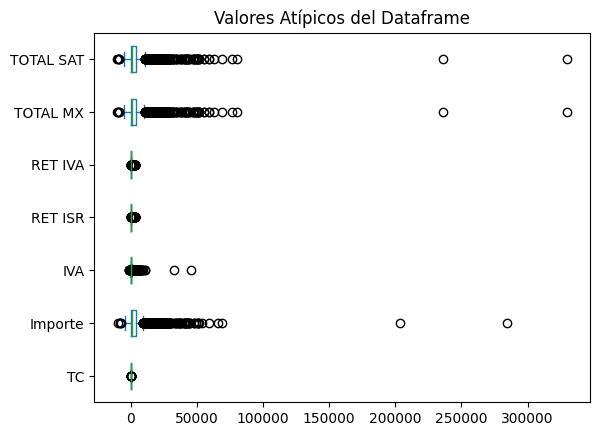

In [104]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df_2022.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

##Eliminacion de Outliers con Cuantiles

In [105]:
#Eliminamos columnas innecesarias
data3= df_2022.drop(['Fecha',"Folio","UUID","RFC","Proveedor",
                   "TIPO GASTO","Descripción","Tipo","Status","Poliza", "MP"], axis=1)

data3

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.60,6439.60
1,1.0,5551.98,888.32,0.0,0.0,6440.30,6440.30
2,1.0,0.00,0.00,0.0,0.0,0.00,0.00
3,1.0,0.00,0.00,0.0,0.0,0.00,0.00
4,1.0,0.00,0.00,0.0,0.0,0.00,0.00
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2573,1.0,17310.30,516.32,0.0,0.0,17826.62,17826.62
2574,1.0,0.00,0.00,0.0,0.0,0.00,0.00
2575,1.0,0.00,0.00,0.0,0.0,0.00,0.00


In [106]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=data3

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido TC               1.000
Importe       9058.900
IVA           1031.150
RET ISR          0.000
RET IVA          0.000
TOTAL MX     10374.700
TOTAL SAT    10485.475
dtype: float64
Limite inferior permitido TC              1.000
Importe     -5435.340
IVA          -618.690
RET ISR         0.000
RET IVA         0.000
TOTAL MX    -6224.820
TOTAL SAT   -6291.285
dtype: float64


In [107]:
#Obtenemos datos limpios del Dataframe
data3_iqr= data3[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
1,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
2,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3,1.0,0.00,0.00,0.0,0.0,0.0,0.0
4,1.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2573,1.0,NaN,516.32,0.0,0.0,NaN,NaN
2574,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2575,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [108]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

TC            20
Importe      305
IVA          303
RET ISR       71
RET IVA       70
TOTAL MX     291
TOTAL SAT    288
dtype: int64

In [109]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
1,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
2,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3,1.0,0.00,0.00,0.0,0.0,0.0,0.0
4,1.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
2572,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2573,1.0,1449.20,516.32,0.0,0.0,1711.5,1782.0
2574,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2575,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [110]:
# Unimos la columnas que quitamos con el dataframe
columnas_eliminadas = df_2022[['Fecha',"Folio","UUID","RFC","Proveedor",
"TIPO GASTO","Descripción","Tipo","Status","Poliza", "MP"]]

data_clean2 = pd.concat([columnas_eliminadas, data4_iqr], axis=1)
data_clean2

,Fecha,Folio,UUID,RFC,Proveedor,TIPO GASTO,Descripción,Tipo,Status,Poliza,MP,TC,Importe,IVA,RET ISR,RET IVA,TOTAL MX,TOTAL SAT
0,2022-01-01,280108,9DA0E63F-1D47-441F-93D7-C2E05AE4D35E,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006876 18/36 de 03/12/...,I,Vigente,PE02-ENE22,PPD,1.0,5551.38,888.22,0.0,0.0,6439.6,6439.6
1,2022-01-01,280109,7E00E776-A839-4D57-B291-411109164B2F,BLE1512082R9,BEPENSA LEASING S.A. DE C.V.,ARRENDAMIENTO FINANCIERO,AA RENTA EXIGIBLE CL0000006877 18/36 de 03/12/...,I,Vigente,PE03-ENE22,PPD,1.0,5551.98,888.32,0.0,0.0,6440.3,6440.3
2,2022-01-01,007817297284,BB6585C1-3B54-4130-AFD0-1867C3764821,BNM840515VB1,"BANCO NACIONAL DE MEXICO, S.A.",COMISION BANCARIA,Servicios de Facturación,I,Vigente,PE01-ENE22,PUE,1.0,0.00,0.00,0.0,0.0,0.0,0.0
3,2022-01-01,5595,B5E4B4EB-6C2F-11EC-BB9D-00155D014009,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,P,Vigente,PE01-ENE22,PUE,1.0,0.00,0.00,0.0,0.0,0.0,0.0
4,2022-01-01,5614,BB6756D1-6CCD-11EC-947D-00155D014407,ZEGC530520V4A,CARLOS ENRIQUE ZERMEÑO GUTIERREZ,COMPRAS,Pago,P,Vigente,PE01-ENE22,PUE,1.0,0.00,0.00,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2572,2022-12-01,863376,E90DA089-3C3B-45C8-A19C-B8810D222F60,BIN940223KE0,"BANCO INVEX, S.A., INSTITUCION DE BANCA MULTIP...",COMISION BANCARIA,COMISIONES E INTERESES,I,Vigente,PD02-DIC22/PE104-ENE23,PUE,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2573,2022-12-01,1092957089,D720ED7C-F370-4236-B269-8873ABB78745,BMN930209927,BANCO MERCANTIL DEL NORTE SA INSTITUCION DE BA...,COMISION BANCARIA,SERVICIOS BANCARIOS,I,Vigente,PD02-DIC22/PE104-ENE23,PUE,1.0,1449.20,516.32,0.0,0.0,1711.5,1782.0
2574,2022-12-01,4,0AFD3EB5-F3DD-43EB-B9FA-79D793CFF417,AAE6411055P8,Aesa Articulos Electricos S.A de C.V,COMPRAS,Pago,P,Vigente,PD02-DIC22/PE104-ENE23,PUE,1.0,0.00,0.00,0.0,0.0,0.0,0.0
2575,2022-12-01,16,E3CA1DA8-581A-5844-80D2-CF0317B3BBEA,AAE6411055P8,AESA ARTICULOS ELECTRICOS,COMPRAS,Pago,P,Vigente,PD02-DIC22/PE104-ENE23,PUE,1.0,0.00,0.00,0.0,0.0,0.0,0.0


In [111]:
#Convertir DataFrame a CSV
data_clean2.to_csv("Datos_Cuantiles2022.csv")

In [114]:
#descargar archivo filtrado en csv
from google.colab import files


files.download("Datos_Cuantiles2022.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>